In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


## Step 1: Load the CSV

In [66]:
df = pd.read_csv("Data/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Step 2: Basic checks

In [67]:
print("Columns:", list(df.columns))
print("DTypes:\n", df.dtypes)
print("Missing values per column:\n", df.isna().sum(), "\n")
print("Duplicate column:\n", df.duplicated().sum(), "\n")

Columns: ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
DTypes:
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
Missing values per column:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64 

Duplicate column:
 0 



## Step 3: Feature Engineering

In [68]:
df["mean_length"] = df[["Length1","Length2","Length3"]].mean(axis=1)
df["lxw"] = df["Length3"] * df["Width"]
df

,Species,Weight,Length1,Length2,Length3,Height,Width,mean_length,lxw
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,120.60000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,134.33472
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,146.04871
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,149.25925
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,174.55600
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667,18.67424
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333,17.13150
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667,17.33004
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333,31.42144


## Step 4: Outliers (IQR) + Capping

In [69]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [70]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,mean_length,lxw
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,120.60000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,134.33472
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,146.04871
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,149.25925
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,174.55600
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667,18.67424
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333,17.13150
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667,17.33004
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333,31.42144


## Step 5: Visualizations

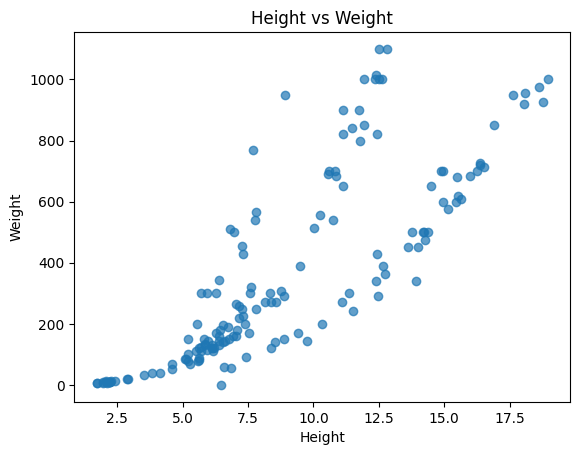

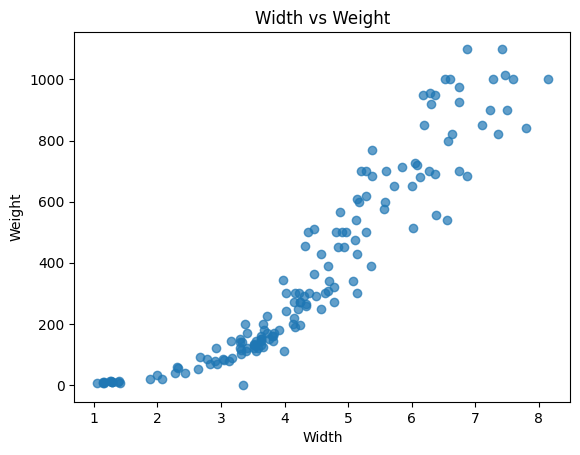

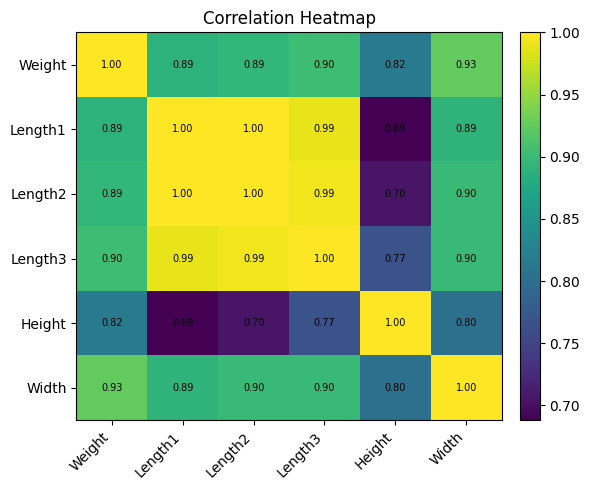

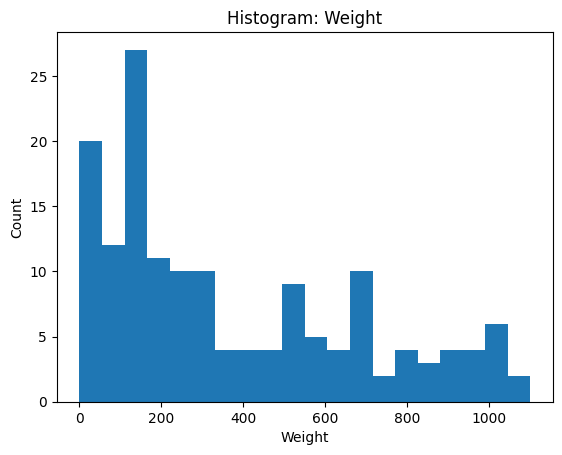

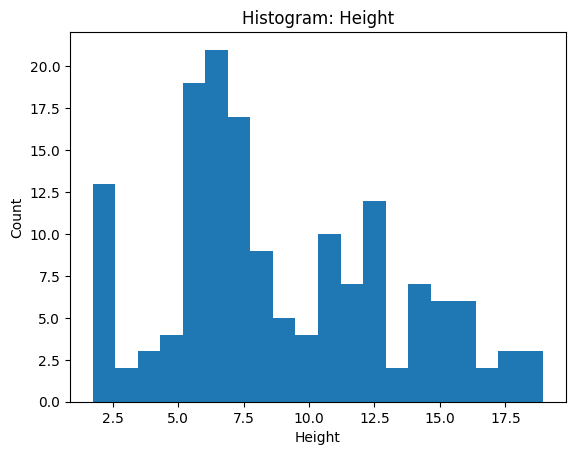

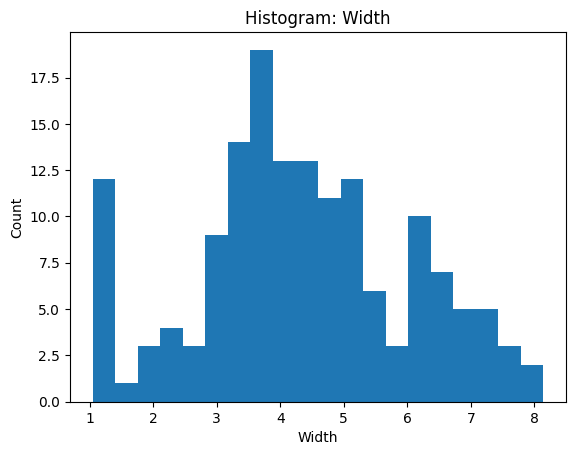

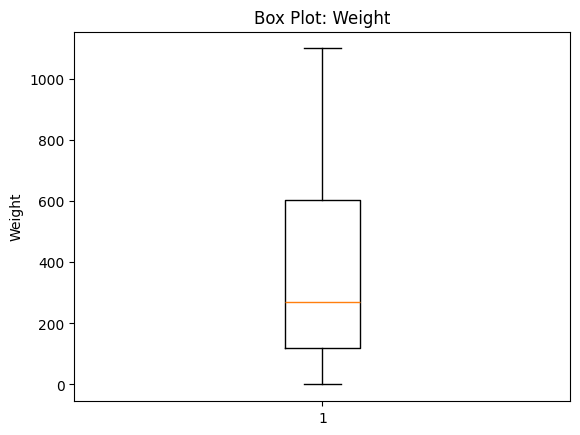

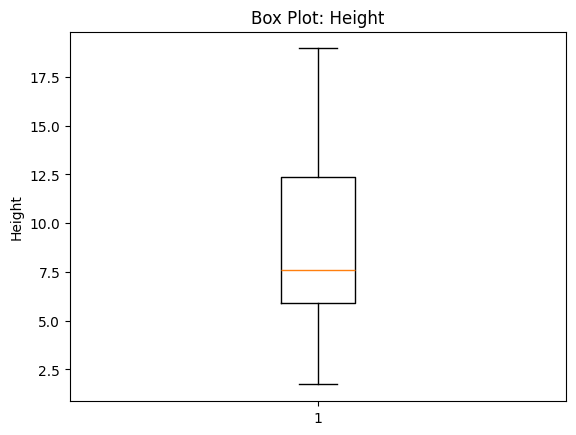

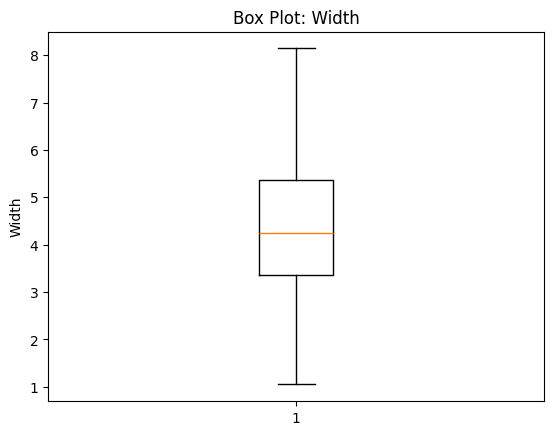

In [71]:
for feat in ["MeanLength","Height","Width","VolumeApprox"]:
    if feat in df.columns:
        plt.figure()
        plt.scatter(df[feat], df["Weight"], alpha=0.7)
        plt.xlabel(feat)
        plt.ylabel("Weight")
        plt.title(f"{feat} vs Weight")
        plt.show()

# 5b) Correlation heatmap (simple)
corr_cols = ["Weight","Length1","Length2","Length3","Height","Width","MeanLength","VolumeApprox"]
corr_cols = [c for c in corr_cols if c in df.columns]
corr = df[corr_cols].corr()

plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="right")
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Correlation Heatmap")
# show numbers on heatmap
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        plt.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center", fontsize=7)
plt.tight_layout()
plt.show()

# 5c) Histograms
for feat in ["Weight","MeanLength","Height","Width","VolumeApprox"]:
    if feat in df.columns:
        plt.figure()
        plt.hist(df[feat].dropna(), bins=20)
        plt.xlabel(feat)
        plt.ylabel("Count")
        plt.title(f"Histogram: {feat}")
        plt.show()

# 5d) Box plots (quick look at outliers)
for feat in ["Weight","MeanLength","Height","Width"]:
    if feat in df.columns:
        plt.figure()
        plt.boxplot(df[feat].dropna(), vert=True)
        plt.ylabel(feat)
        plt.title(f"Box Plot: {feat}")
        plt.show()

## Step 6: Prepare data (dummies + scaling)

In [72]:
X, y = df[["Length1","Length2","Length3","Height","Width","mean_length","lxw","Species"]], df["Weight"]

X = pd.get_dummies(X, columns=["Species"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

## Step 7: Train 4 models

In [73]:
lin = LinearRegression()
lin.fit(X_train_s, y_train)

ridge = Ridge(alpha=10.0, random_state=42)
ridge.fit(X_train_s, y_train)

lasso = Lasso(alpha=0.001, max_iter=20000, random_state=42)
lasso.fit(X_train_s, y_train)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_s)
X_test_poly  = poly.transform(X_test_s)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

c:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.296e+04, tolerance: 1.141e+03
  model = cd_fast.enet_coordinate_descent(


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step 8: Evaluate (RMSE & R^2) + Residual plots for best

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_lin = lin.predict(X_test_s)
print("Linear Regression -> R²:", r2_score(y_test, y_pred_lin),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# Ridge Regression
y_pred_ridge = ridge.predict(X_test_s)
print("Ridge Regression  -> R²:", r2_score(y_test, y_pred_ridge),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# Lasso Regression
y_pred_lasso = lasso.predict(X_test_s)
print("Lasso Regression  -> R²:", r2_score(y_test, y_pred_lasso),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Polynomial Regression
y_pred_poly = poly_reg.predict(X_test_poly)
print("Polynomial (deg=2) -> R²:", r2_score(y_test, y_pred_poly),
      "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Linear Regression -> R²: 0.9769461165840254 RMSE: 51.51417079198931
Ridge Regression  -> R²: 0.9565437573491743 RMSE: 70.72626987395408
Lasso Regression  -> R²: 0.9769302857186712 RMSE: 51.531854883075404
Polynomial (deg=2) -> R²: 0.9560473795527107 RMSE: 71.1290574173538
